In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
netflix_pank_titles_url = "../input/netflix-tv-shows-and-movies/titles.csv"
netflix_pank_credits_url = "../input/netflix-tv-shows-and-movies/credits.csv"

In [3]:
titles = pd.read_csv(netflix_pank_titles_url)
credits = pd.read_csv(netflix_pank_credits_url)

In [4]:
titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


In [5]:
credits.head()

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


In [6]:
number_of_actors = credits['name'].nunique()
print('The number of individual actors credited in netflix shows:',number_of_actors)

The number of individual actors credited in netflix shows: 53687


Text(0.5, 1.0, 'Run Time Line')

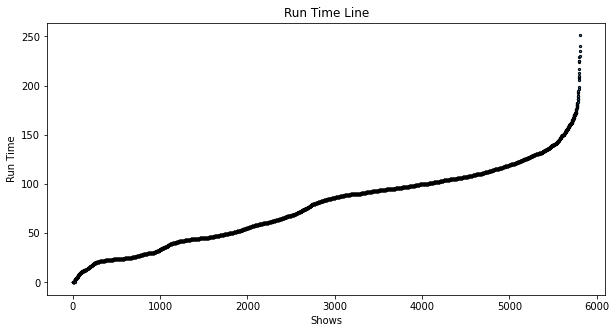

In [7]:
runtime = titles['runtime']
y = np.sort(runtime)
x = np.arange(5806)
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x, y, s=5, facecolor='C0', edgecolor='k');
ax.set_xlabel('Shows')
ax.set_ylabel('Run Time')
ax.set_title('Run Time Line')

[Text(0.5, 1.0, 'Regression Plot of Run Time'),
 Text(0.5, 0, 'Shows'),
 Text(0, 0.5, 'Run Time')]

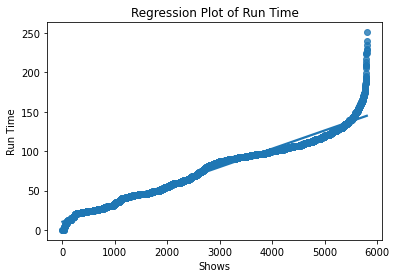

In [8]:
sns.regplot(x=x, y=y).set(title="Regression Plot of Run Time", xlabel = "Shows", ylabel = "Run Time")

In [9]:
titles['runtime'].describe()

count    5806.000000
mean       77.643989
std        39.474160
min         0.000000
25%        44.000000
50%        84.000000
75%       105.000000
max       251.000000
Name: runtime, dtype: float64

In [10]:
release_year = titles['release_year'].value_counts()

In [11]:
release_year_sorted = np.sort(release_year)

In [12]:
print('The latest year of a title released on Netflix:',titles['release_year'].max())

The latest year of a title released on Netflix: 2022


In [13]:
print('The earliest year of a title released on Netflix:',titles['release_year'].min())

The earliest year of a title released on Netflix: 1945


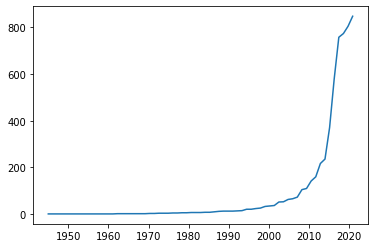

In [14]:
x = np.arange(1945, 2022, (77/67))
y = release_year_sorted
plt.plot(x, y)  
plt.show()

In [15]:
titles['age_certification'].value_counts()

TV-MA    841
R        575
TV-14    470
PG-13    440
PG       246
TV-PG    186
G        131
TV-Y7    112
TV-Y     105
TV-G      76
NC-17     14
Name: age_certification, dtype: int64

In [16]:
num_appearance = credits['name'].value_counts()

In [17]:
prolific_actors = num_appearance.head(10)

In [18]:
prolific_actors

Shah Rukh Khan           30
Anupam Kher              25
Boman Irani              25
Kareena Kapoor Khan      25
Paresh Rawal             22
Takahiro Sakurai         22
Nawazuddin Siddiqui      21
Priyanka Chopra Jonas    21
Raúl Campos              21
Jan Suter                20
Name: name, dtype: int64

In [19]:
print('There are', credits['name'].value_counts()['Robert De Niro'], 'Robert Dinero movies on Netflix')

There are 10 Robert Dinero movies on Netflix


In [20]:
country_productions = titles['production_countries'].value_counts()

In [21]:
top_20_countries = country_productions.head(20)

In [22]:
top_20_countries = pd.DataFrame(top_20_countries)

In [23]:
top_20_countries.rename(index={0: "Country", "production_countries": "show_count"})

,production_countries
['US'],1950
['IN'],605
['JP'],266
[],232
['GB'],219
['KR'],210
['ES'],159
['FR'],124
['CA'],103
['MX'],95


In [24]:
credits['role'].value_counts()

ACTOR       72690
DIRECTOR     4523
Name: role, dtype: int64